In [1]:
import os
import cv2
import json
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
ann_path = '/mnt/lwll/lwll-coral/hrant/annotations/'
filename = 'few_shot_visdrone_val_vis_drone_val_inter_internearestexact_patch_16.npy'
ann_path += filename

In [3]:
train = '/mnt/lwll/lwll-coral/hrant/annotations/'
filename = 'few_shot_visdrone_vis_drone_train_inter_internearestexact_patch_16.npy'
train += filename

In [6]:
%%time
data = np.load(ann_path, allow_pickle=True).item()

CPU times: user 738 ms, sys: 5.79 s, total: 6.52 s
Wall time: 40.8 s


In [7]:
data

{'images': [{'file_name': '/lwll/development/vis_drone/vis_drone_full/train/0000002_00005_d_0000014.jpg',
   'height': 540,
   'width': 960,
   'id': 0,
   'black_image': array([[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [4., 4., 4., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]]),
   'patch_labels': array([ 4.,  4.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  4.,  4.,  4.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  5.,  0.,  0.,  4.,  0.,  4.,  4.,  4.,  4.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,  4.,  4.,  4.,
           4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  5.,
           0.,  0.,  0.,  0.

In [3]:
%%time
train = np.load(train, allow_pickle=True).item()

CPU times: user 174 ms, sys: 922 ms, total: 1.1 s
Wall time: 1.1 s


In [4]:
len(train['images'])

88

In [5]:
with open('/mnt/lwll/lwll-coral/hrant/annotations/few_shot_visdrone.json') as f:
    init = json.load(f)
    
init.keys()

dict_keys(['images', 'annotations', 'categories'])

In [6]:
idx = 0

In [247]:
bads.append(idx)

In [261]:
bads

[5,
 12,
 14,
 15,
 18,
 20,
 21,
 22,
 23,
 24,
 26,
 29,
 30,
 32,
 34,
 36,
 37,
 40,
 44,
 46,
 47,
 48,
 50,
 51,
 54,
 59,
 60,
 61,
 64,
 67,
 77,
 78,
 82,
 84]

In [260]:
len(bads)

34

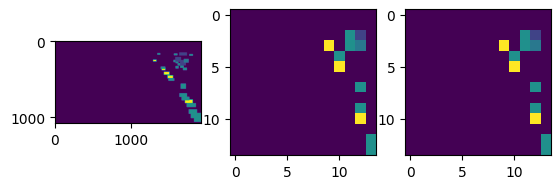

In [257]:
idx += 1
fig, axes = plt.subplots(ncols=3, nrows=1)
axes[0].imshow(train['images'][idx]['black_image'])
axes[1].imshow(train['images'][idx]['patch_labels'].reshape(14, 14))
axes[2].imshow(cv2.resize(train['images'][idx]['black_image'], (14,14), interpolation=cv2.INTER_NEAREST_EXACT));

9999977_00000_d_0000098
dict_keys(['file_name', 'height', 'width', 'id']) [87]


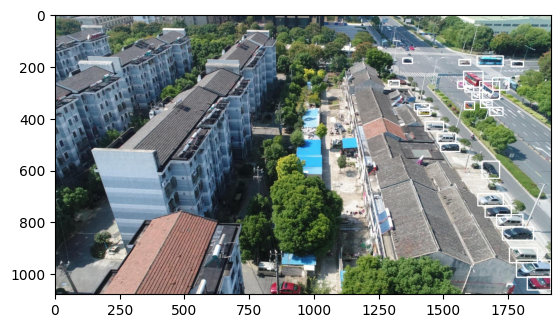

In [258]:
name = train['images'][idx]['file_name'].split('/')[-1].split('.')[0]
print(name)

ids = []
for imgs in init['images']:
    if name in imgs['file_name']:
        ids.append(imgs['id'])
        
print(init['images'][0].keys(), ids)

bbox = [annots['bbox'] for annots in init['annotations'] if annots['image_id'] == ids[0]]

img = np.array(Image.open(train['images'][idx]['file_name']))

for box in bbox:
    img = cv2.rectangle(img, [box[0], box[1]], [box[0]+box[2], box[1]+box[3]], (255, 255, 255), 3)
plt.imshow(img);

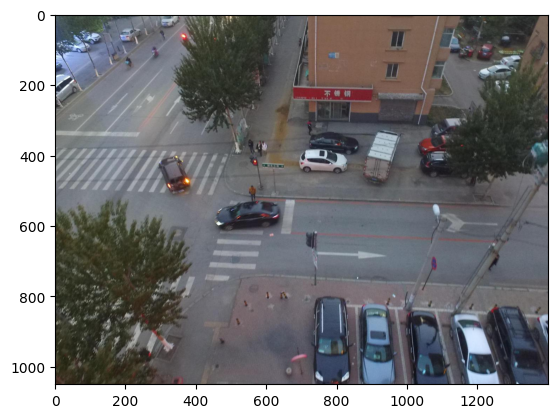

In [29]:
img = np.array(Image.open(train['images'][idx]['file_name']))
# plt.imshow(img);

In [30]:
bbox

[[454, 530, 184, 85],
 [696, 380, 139, 73],
 [718, 334, 141, 68],
 [1037, 387, 161, 85],
 [1034, 341, 182, 66],
 [1201, 137, 108, 55],
 [1270, 111, 67, 61],
 [1068, 291, 154, 55],
 [875, 325, 121, 162],
 [1104, 51, 49, 59],
 [1199, 84, 50, 52],
 [179, 39, 66, 39],
 [7, 74, 95, 35],
 [37, 37, 99, 50],
 [991, 840, 125, 209],
 [734, 797, 108, 252],
 [865, 820, 105, 228],
 [1125, 849, 137, 199],
 [1224, 829, 171, 219],
 [300, 0, 60, 37],
 [0, 168, 68, 97],
 [199, 121, 19, 27],
 [275, 92, 15, 23],
 [296, 45, 19, 27],
 [196, 131, 27, 31],
 [296, 54, 22, 27],
 [271, 101, 23, 25],
 [690, 63, 12, 31]]

In [31]:
import pandas as pd

df = pd.read_csv(f'/mnt/lwll/lwll-coral/hrant/session_data/tP7Qd3P42Oz9O9K92nDC/base/labels/{name}.txt', sep=' ', header=None)
df

,0,1,2,3,4
0,5,454,530,638,615
1,5,696,380,835,453
2,5,718,334,859,402
3,5,1037,387,1198,472
4,5,1034,341,1216,407
5,5,1201,137,1309,192
6,5,1270,111,1337,172
7,10,1068,291,1222,346
8,11,875,325,996,487
9,5,1104,51,1153,110


In [19]:
import pandas as pd

df = pd.read_csv(f'/lwll/external/vis_drone/validation_labels/{name}.txt', sep=' ', header=None)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/lwll/external/vis_drone/validation_labels/9999998_00294_d_0000247.txt'

In [ ]:
/lwll/external/vis_drone/validation.txt

In [40]:
!ls -lah /lwll/external/vis_drone/validation_labels

total 2.0M
drwxrwxr-x 2 hkhachatrian hkhachatrian  32K Dec 13 09:48 .
drwxrwxr-x 3 hkhachatrian hkhachatrian 4.0K Feb 15 06:48 ..
-rw-rw-r-- 1 hkhachatrian hkhachatrian  939 Dec 13 09:48 0000002_00005_d_0000014.txt
-rw-rw-r-- 1 hkhachatrian hkhachatrian  818 Dec 13 09:48 0000010_00569_d_0000056.txt
-rw-rw-r-- 1 hkhachatrian hkhachatrian   30 Dec 13 09:48 0000047_01000_d_0000090.txt
-rw-rw-r-- 1 hkhachatrian hkhachatrian   17 Dec 13 09:48 0000068_00001_d_0000001.txt
-rw-rw-r-- 1 hkhachatrian hkhachatrian   17 Dec 13 09:48 0000071_05298_d_0000008.txt
-rw-rw-r-- 1 hkhachatrian hkhachatrian   89 Dec 13 09:48 0000072_05564_d_0000007.txt
-rw-rw-r-- 1 hkhachatrian hkhachatrian   59 Dec 13 09:48 0000076_01012_d_0000004.txt
-rw-rw-r-- 1 hkhachatrian hkhachatrian   19 Dec 13 09:48 0000076_04925_d_0000017.txt
-rw-rw-r-- 1 hkhachatrian hkhachatrian  162 Dec 13 09:48 0000106_00673_d_0000050.txt
-rw-rw-r-- 1 hkhachatrian hkhachatrian  133 Dec 13 09:48 0000109_00606_d_0000062.txt
-rw-rw-r-- 1 hkhacha